# Импорт

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [148]:
data = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 2
# data = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = data.shape[0]
scale = StandardScaler().fit_transform(data)
# y_data = StandardScaler().fit_transform(data['Appliances'][0:sl])
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(data.drop('Appliances', axis=1)), scale.T[-1], test_size=0.25)


In [149]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*1.5),
                                activation='elu',
                                input_shape=(X_train.shape[1],),
                                name='input',
                              #   kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                # bias_initializer=tf.keras.initializers.GlorotNormal,
                                use_bias=True
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]//2),
                                activation='sigmoid',
                                name='hidden_layer_2',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
# model.add(tf.keras.layers.Dense(int(X_train.shape[1]*0.5),
#                                 activation='elu',
#                                 name='hidden_layer_3',
#                                 #   bias_constraint=tf.keras.constraints.max_norm(1000.),
#                                 # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
#                                 use_bias=True,
#                                 # bias_initializer=tf.keras.initializers.GlorotNormal
#                                 ))
model.add(tf.keras.layers.Dense(1,
                                name='output',
                                activation='sigmoid',
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.HeNormal
                                ))
model.compile(loss='mse',optimizer='Adam', metrics=['mse'])


## Компиляция

In [150]:
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae'],
    jit_compile=True
)


# Обучение

In [151]:
model.fit(
    X_train,
    y_train,
    validation_split=0.6,
    epochs=50,
    batch_size=15,
    # workers=4,
    use_multiprocessing=True,
)


Epoch 1/50
371/371 [==============================] - 4s 7ms/step - loss: 0.8435 - mse: 0.8435 - mae: 0.7699 - val_loss: 0.8220 - val_mse: 0.8220 - val_mae: 0.7687
Epoch 2/50
371/371 [==============================] - 2s 6ms/step - loss: 0.8850 - mse: 0.8850 - mae: 0.8033 - val_loss: 0.9493 - val_mse: 0.9493 - val_mae: 0.8374
Epoch 3/50
371/371 [==============================] - 2s 5ms/step - loss: 0.9645 - mse: 0.9645 - mae: 0.8416 - val_loss: 0.9954 - val_mse: 0.9954 - val_mae: 0.8654
Epoch 4/50
371/371 [==============================] - 2s 5ms/step - loss: 0.9624 - mse: 0.9624 - mae: 0.8429 - val_loss: 0.8268 - val_mse: 0.8268 - val_mae: 0.7729
Epoch 5/50
371/371 [==============================] - 2s 5ms/step - loss: 0.7861 - mse: 0.7861 - mae: 0.7388 - val_loss: 0.9701 - val_mse: 0.9701 - val_mae: 0.8546
Epoch 6/50
371/371 [==============================] - 2s 5ms/step - loss: 0.9404 - mse: 0.9404 - mae: 0.8345 - val_loss: 0.8977 - val_mse: 0.8977 - val_mae: 0.8191
Epoch 7/50
371/3

# Predict

In [152]:
y_predicted = model.predict(X_test).T[0]


145/145 [==============================] - 0s 2ms/step


In [153]:
y_predicted


array([0.00158808, 0.00158808, 0.9925748 , ..., 0.00158808, 0.00158808,
       0.00158808], dtype=float32)

In [154]:
y_predicted.mean(), y_predicted.std()


(0.29129404, 0.45073855)

In [155]:
model.weights

[<tf.Variable 'input/kernel:0' shape=(435, 652) dtype=float32, numpy=
 array([[ 0.05219433, -0.05299548,  0.03690336, ...,  0.06813437,
          0.00507646, -0.02977188],
        [-0.08269928, -0.00287121,  0.03508724, ..., -0.01825299,
          0.02541294, -0.00858933],
        [-0.02184483, -0.01263919,  0.03339046, ...,  0.00430614,
         -0.02230768,  0.06814992],
        ...,
        [-0.03940174, -0.0785876 , -0.07263246, ...,  0.05767521,
          0.05427381,  0.08672973],
        [ 0.03079993, -0.03200732, -0.01754932, ...,  0.05237237,
          0.03354143,  0.05945444],
        [ 0.04803541,  0.042471  , -0.01362407, ...,  0.00077141,
          0.05721728,  0.04454647]], dtype=float32)>,
 <tf.Variable 'input/bias:0' shape=(652,) dtype=float32, numpy=
 array([ 7.82157853e-03, -9.99487354e-04,  0.00000000e+00,  2.47863736e-02,
         1.35235349e-03,  0.00000000e+00,  1.16838468e-02,  0.00000000e+00,
        -2.22676136e-02,  0.00000000e+00, -4.25835824e-05,  0.00000000e

# Оценка качества 

In [156]:
y_all = model.predict(PolynomialFeatures(power).fit_transform(
    data.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 1s 2ms/step


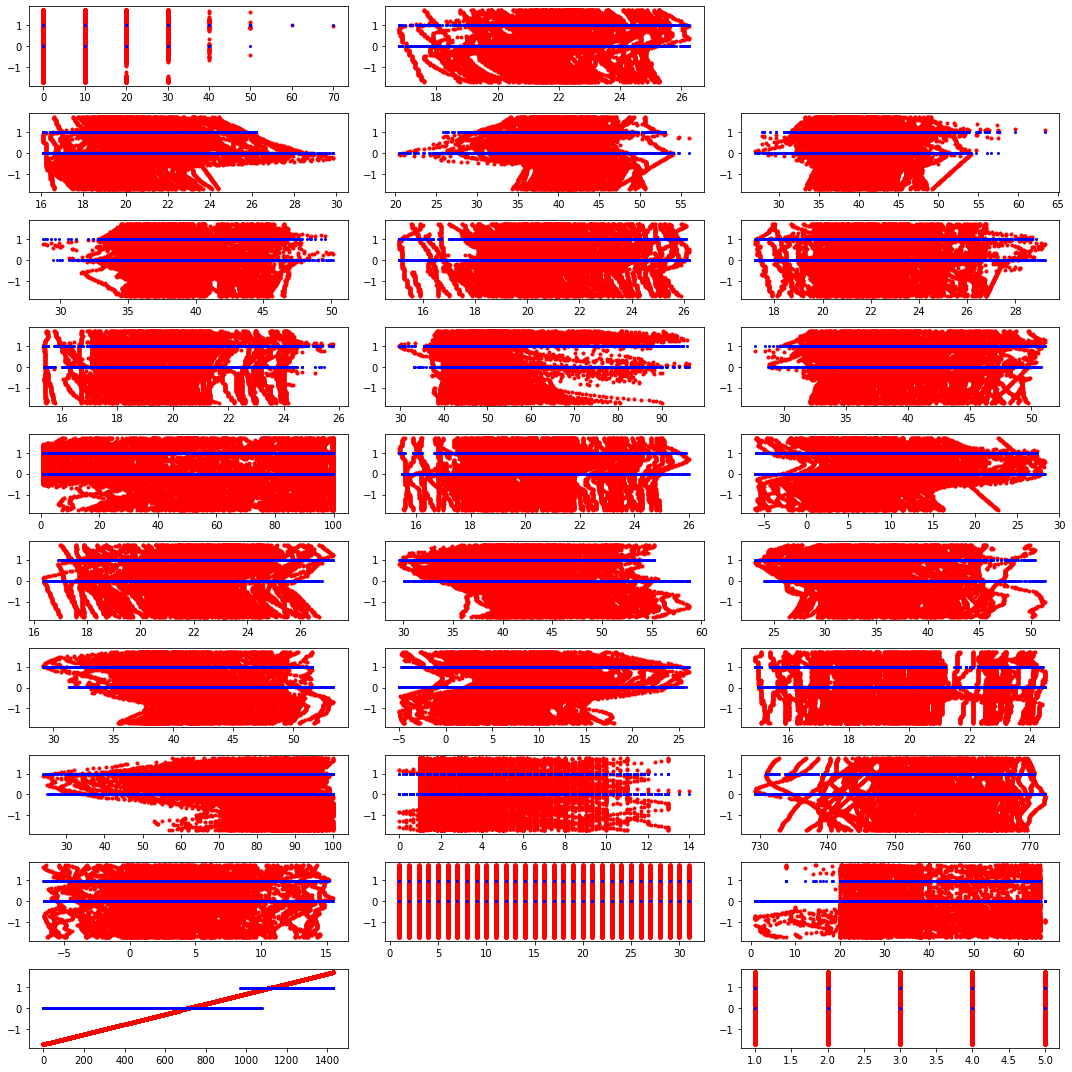

In [157]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = data.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(data[i], scale.T[-1], 'ro', markersize=3)
  ax.plot(data[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

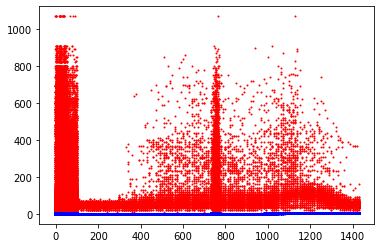

In [158]:
plt.plot(data.drop('Appliances', axis=1)[0:sl],
         data['Appliances'][0:sl], 'ro', markersize=1)
plt.plot(data.drop('Appliances', axis=1)[0:sl], y_all*6.1, 'bo', markersize=1)


In [163]:
print(f"MAE: {mean_absolute_error(y_predicted*2.7, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted*2.7, y_test)}',
      f'MSE: {mean_squared_error(y_predicted*2.7, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted*2.7, y_test)}',
      f'R^2: {r2_score(y_predicted*2.7, y_test)}',
      sep='\n')

MAE: 0.9284334547839146
RMSE: 1.168456652268368
MSE: 1.080951734476784
MAPE: 118.20956939298543
R^2: 0.2110751178517425
